# 6. hét / I. Elméleti bevezető

Az első és legfontosabb kérdés ahhoz, hogy elkezdhessünk képekkel dolgozni az az, hogy megértsük egyáltalán hogyan tárolja a számítógép az egyes *képek*et. Az alapvető koncepció fájlformátumonként eltérő, ebbe a kurzus keretein belül nem fogunk belemenni, hogy a *raszter* `.png`, `.bmp`, `.jpg`, avagy a *vektorgrafikus* `.svg`, `.eps`, `.pdf` fileformátumok pontosan miben is térnek el egymástól, viszont ezt a két típust praktikus ismerni, ugyanis teljesen eltérő módon lehetséges a feldolgozás a két esetben.

**Vektorgrafikus és raszter képek**  
Az alapvető eltérés a kettő között, hogy míg a **vektorgrafikus** kép "tetszőleges" mértékben nagyítható, a képminőség/felbontás romlása nélkül, addig a **raszter**es képek apró pixelekből állnak össze, és minél inkább belenagyítunk, annál "pixelesebb", elmosódottabb lesz a kép. Itt azt kell látni a háttérben, hogy a *vektorgrafikus* ábrázolás a kép elemeit: görbéket és síkidomokat mind *matematikai függvények*, vagy *implicit egyenletek* segítségével adjuk meg. Ezzel szemben egy *raszter* kép tetszőleges számú (szabványos értékek pl `1080x1920`, vagy `3840x2160`) pixelből áll, melyek egyenként tartalmazzák, hogy az adott képpont *milyen színű*. Mi alapvetően a raszteres képekkel fogunk foglalkozni.


**Színmodellek**  
A következő kérdés, amivel foglalkozni fogunk az nem más, mint: *Hogyan tudjuk leírni az egyes pixelek színét?*
Fogalmazzuk át a feladatot. Adott az úgynevezett *gamut*, amely a látható színtartomány halmazának egy teljes részhalmaza (H - Hue / S - Saturation skálán). A kérdés pedig: hogyan tudunk ebből minél többet reprezentálni, megjeleníteni?

A valóságban nagyon sok különböző modell él és virul, ebből mi a következőket fogjuk áttekinteni:

- **RGB színmodell**. Ez az a modell, amely a modern világban a legnagyobb mértékben elterjedt. Az alapvető koncepció az, hogy a Vörös, Zöld és Kék színekből *additív* módon képezzük a színeket. Az RGB csatornákat felosztjuk 8/10/12 bit mélységben, így egy 0-255/1023/4095 skálán megmondhatjuk, hogy az adott képpont mekkora mértékben tartalmazzon RGB komponenseket. Ennek biológiai oka az, hogy az **emberi színérzékelés** is az úgynevezett **csapok** segítségével történik, amely fotoreceptorok a <span style="color:red"> vörös *(420-440 nm)*</span>, <span style="color:greenyellow"> zöld *(534-545 nm)*</span> és <span style="color:dodgerblue"> kék *(564-580 nm)*</span> fényt érzékelik.

Tehát ekkor egy pixel színe megadható egy $\mathbb{R}^3$-beli vektor segítségével. Az R = 124, G = 58, B = 201 színkódú pixelnek a $\begin{bmatrix}124 & 58 & 201 \end{bmatrix}$ vektor felel meg. Ha egy 1080p felbontású kép minden pixelhez hozzárendeljük az RGB színkódját, akkor ezáltal kapunk egy 1080x1920x3-as *mátrix*ot. **Nota bene arról van itt szó, hogy a képfeldolgozás alapjául a mátrixműveletek és a lineáris algebra szolgál!**
- **RGBA színmodell**. Ez tulajdonképpen annyit tesz lehetővé, hogy egy úgynevezett **alfa-csatornán** megadhatjuk, hogy mennyire legyen **átlátszó** az adott szín. Ez nem a megjelenítésben játszik szerepet, a monitorunk természetesen nem tud átlátszó lenni. Viszont amikor képszerkesztéskor szeretnénk rétegeket egymásra helyezni, akkor nagyon megkönnyíti a dolgunkat, ha például egy logót nem kell körbevágnunk, hanem a környezete átlátszó így könnyen rá tudjuk helyezni egy másik képre. Ekkor az egyes pixeleket már egy $\mathbb{R}^4$-beli vektorokkal írhatjuk le.
- **HSL és HSV színmodell**. Mielőtt részleteznénk ezen színmódellt, <span style="color:red">nyomatékosan kérjük a saját és programozótársaik biztonsága érdekében, hogy amennyiben csak tehetik (azaz nem az új Photoshop verzióért felelős fejlesztőmérnökök lesznek) **kerüljék** ezen színmodell használatát **a programozásban**!!!</span> A HSL/V színmnodellek a korábban már részletezett RGB modell egyesfajta transzformációjaként születtek meg, ahol már nem azon van a hangsúly, hogy az emberi szem hogyan **érzékeli** a színeket, hanem azon, hogyan **értelmezi** a színeket az agyunk. Ezért az RGB skálát átalakítjuk a *Hue* (Árnyalat) - *Saturation* (Telítettség) - *Lightness* (Fényesség) / *Value* (Érték) skálákra. Ez a *kézi képfeldolgozásnak* elengedhetetlen eszközévé nőtte ki magát, ugyanis a digitálisan tárolt RGB értékeket átfogóan lehet velük változtatni. Például, ha azt látjuk, hogy egy elkészült fotón valakinek az arca kipirult és vöröses, akkor a Hue értéket narancssárgás-sárgás irányba tolva és közben Saturation csökkentve orvosolhatjuk a problémát. Így az RGB és HSL/V színmodellek között alapvetően nagy átjárhatóság van, viszont míg az sRGB egy **abszolút színteret** definiál (azaz minden szín egyértelműen előállítható), addig a HSL/V modell önmagában nem, csak specifikus karakterisztikák, mint például a **gamma-karakterisztika** segítségével transzformálható egy az egyben vissza. Ezért a programozásban igyekezzünk RGB modell szerint dolgozni, mert például egy neurális háló betanítását megnehezíti, ha egy adott szín több különböző módon is előállítható és nem rajzolódnak ki egyértelműen a minták. Természetesen Photoshop karrierünk során ez nem releváns, ugyanis a Margit néni nem az RGB kódokat fogja nézegetni, hanem magát az elkészült fotót az akciós újságban.



# 6. hét / II. Színmodellek a gyakorlatban

Szükséges importok:
- **numpy**: a mátrixok és vektorok kezeléséhez,
- **skimage**: az URL-ek beolvasásához,
- **matplotlib.pylab**: a képek megjelenítéséhez és hisztogramok készítéséhez,
- **OpenCV**: a képfeldolgozáshoz magához.

In [2]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pylab as plt

**1. Példa** Olvassunk be egy képet az internetről és jelenítsük meg!

Adott egy URL, ezt az `io.imread()` függvény segítségével letölthetjük és eltároljuk. Ezt követően próbáljuk meg a `print()` és `plt.imshow()` segítségével megjeleníteni ezeket! Mit látunk?

[[[ 39  23   5]
  [ 40  23   5]
  [ 40  24   6]
  ...
  [170 141 116]
  [173 141 115]
  [175 140 113]]

 [[ 42  25   7]
  [ 42  25   7]
  [ 43  26   8]
  ...
  [170 139 114]
  [173 138 111]
  [174 137 109]]

 [[ 43  26   8]
  [ 43  26   8]
  [ 44  27   9]
  ...
  [168 137 111]
  [172 137 110]
  [174 137 110]]

 ...

 [[ 95  48  53]
  [114  64  69]
  [120  69  73]
  ...
  [ 53  20  13]
  [ 55  23  15]
  [ 56  25  18]]

 [[ 95  19  21]
  [ 93  17  19]
  [ 81  10  10]
  ...
  [ 53  20  13]
  [ 55  22  15]
  [ 53  22  15]]

 [[ 61   0   0]
  [ 59   0   0]
  [ 60   1   1]
  ...
  [ 49  16   9]
  [ 52  19  12]
  [ 52  21  14]]]
(300, 300, 3)
270000


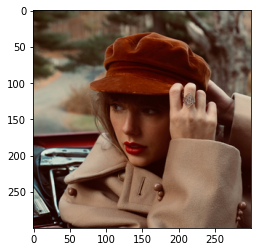

In [3]:
# Keresünk az interneten egy "random" képet
url = "https://upload.wikimedia.org/wikipedia/en/4/47/Taylor_Swift_-_Red_%28Taylor%27s_Version%29.png"

# Az io.imread() függvény segítségével beolvassuk a képet
image = io.imread(url)

# Megjelenítjük a képet
print(image)
plt.imshow(image)

# Nézzük meg a méretét a mátrixnak!
print(image.shape)
print(image.size)

**2. Példa** Bontsuk fel a képet RGB komponensekre!

A `cv2.split()` függvény segítségével felbontjuk a képet RGB komponensekre. Ezzel gyakorlatilag kiszedjük egyenként a tisztán vörös, zöld és kék értékeket a képről. Ha ezeket a `cv2.merge()` segítségével ráhelyezzük egy teljesen fekete képre, ekkor megkapjuk a tisztán vörös-zöld-kék komponensképeket.

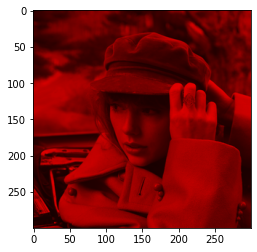

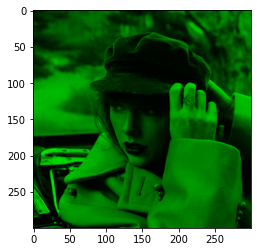

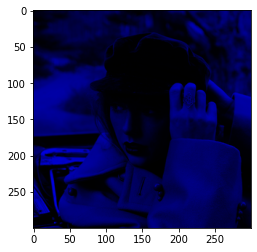

In [4]:
# A cv2.split() függvény segítségével különválasztjuk az RGB csatornákat
red, green, blue = cv2.split(image)

# Létrehozunk teljesen fekete képeket (azaz ami 0-kal van tele)
zeros=np.zeros(blue.shape, np.uint8)

# A teljesen fekete képekre rátesszük az egyes színeket
image_red=cv2.merge((red,zeros,zeros))
image_green=cv2.merge((zeros,green,zeros))
image_blue=cv2.merge((zeros,zeros,blue))

# Megjelenítjük a képeket
plt.imshow(image_red)
plt.show()
plt.imshow(image_green)
plt.show()
plt.imshow(image_blue)
plt.show()

**1. feladat**: Készítsük el a *Red (Taylor's Version)* album alapján a *Blue (Taylor's Version)* albumot!

Cseréljük meg a kék és vörös csatornákat és állítsuk össze BGR sorrendben a képet!

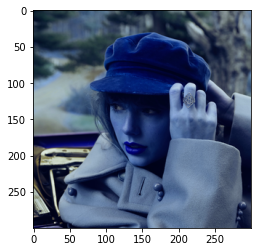

In [5]:
# A cv2.merge() függvénnyel BGR sorrendben összefűzzük a képeket
image_BGR = cv2.merge((blue,green,red))
plt.imshow(image_BGR)
plt.show()

Természetesen lehetséges egyéb geometriai transzformációkat is létrehozni a képen, pusztán a lineáris algebra eszközeivel, így akár tudunk
- Forgatni
- Körülvágni
- Homályosítani (súlyozott átlag)
- Élesíteni

**3. példa** Blur használata

Képfeldolgozás során gyakran az első lépés az, hogy valamelyest elhomályosítjuk a képet, idegen szóval alkalmazunk egy **blur**t. Ezt legegyszerűbben úgy tehetjük meg, ha minden egyes pixel helyébe beírjuk a környezetében szereplő pixelek átlagát. Matematikailag ez úgy néz ki, hogy adott egy $K\in\mathbb{R}^{n\times n}$ **kernel**, amely például 3x3-as esetben így néz ki:

$$\begin{equation*}\mathbf{K} = \dfrac{1}{9}\begin{bmatrix}1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}\end{equation*}$$
Ezzel a kernellel végigmegyünk az összes pixelen és kapunk egy elmosódott képet. Ennek az a célja, hogy **csökkentsük** az esetleg megjelenő **zaj**t, és a hirtelen átmeneteket, amik megnehezítenék a képfeldolgozást, redukáljuk.

A gyakorlatban jellemzően az úgynevezett **Gaussian-blur**t használjuk, ami hasonló elven működik, viszont súlyozza a pixel környezetét egy haranggörbe (Gauss-görbe) mintájára. Egy 3x3-as esetben a kernel a következő módon néz ki:
$$\begin{equation*}\mathbf{K} = \dfrac{1}{16}\begin{bmatrix}1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}\end{equation*}$$

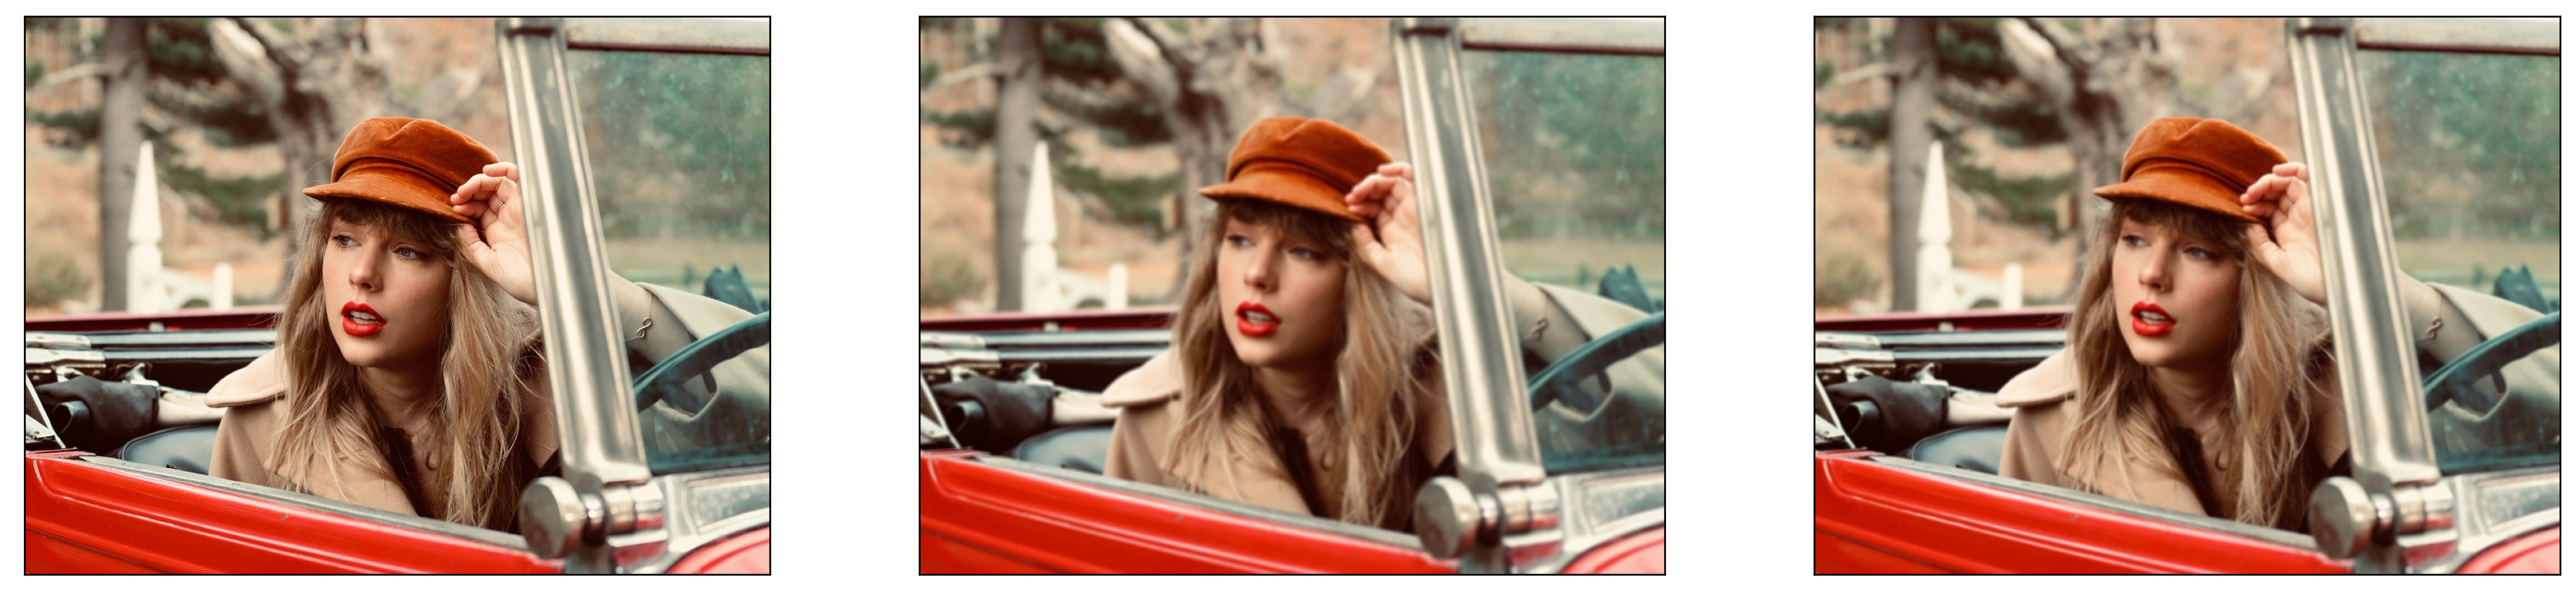

In [27]:
# Keresünk az interneten egy "random" képet
url = "https://static.independent.co.uk/2021/11/11/12/newFile.jpg?width=1200"

# Az io.imread() függvény segítségével beolvassuk a képet
image = io.imread(url)

# Alkalmazzunk egyszerű átlagolást
image_blur = cv2.blur(image,(7,7))

# Alkalmazunk egy súlyozott átlagolást
image_gaussian = cv2.GaussianBlur(image,(7,7),0)

# Megjelenítjük a plotokat
fig,ax = plt.subplots(1,3,figsize=(20,6),dpi=300)
plt.subplot(1,3,1),plt.imshow(image)
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(image_blur)
plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(image_gaussian)
plt.xticks([]),plt.yticks([])
plt.show()

# 6. hét / III. Hisztogramok készítése

**4. példa** Hisztogram készítése

A **hisztogram** egy olyan *plot*, amelynek azt mutatja meg, hogy egyes értéktartományokba, az úgynevezett *bin*ekbe hány pixel esik. Azaz azt írja le, hogy hány pixel van, aminek 0,1...255 az R,G,B értéke. Tehát azt vizsgáljuk meg, hogy az egyes RGB komponensek mennyire gyakran fordulnak elő a képekben!

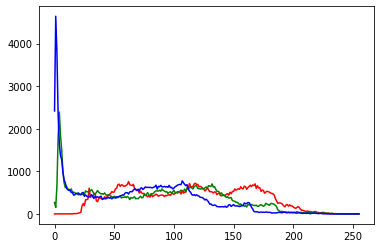

In [7]:
def RGBhist(image):
  # Definiáljuk a színek halmazát
  colors=('r','g','b')

  # Egyes színenként végigmegyünk, hogy hány 0,1...255 értékű pixel van
  for i,column in enumerate(colors):
    hist=cv2.calcHist([image],[i],None,[256],[0,255])
    # Elkészítjük a plotot
    plt.plot(hist,color=column)

RGBhist(image)
# Megjelenítjük a plotot
plt.show()

*Azt kaptuk-e amit vártunk? Mennyi vörös, zöld és kék komponensre számítottunk?*

Az **Image Histogram** írja le egy adot képen belül a pixelek értékeinek eloszlását. Ennek a módosításával lehetőségünk adódik arra, hogy például a képminőséget javítsuk, a zajt szűrjük. Néhány alkalmazás:
- A **kontraszt változtatása**: ha a hisztogramot *összenyomjuk*, akkor *csökken*, míg ha *megnyújtjuk*, akkor *növekedik* a kontraszt. (A kontraszt alapvetően a sötét és világos részek fényerősségének különbsége. Minél nagyobb a kontraszt, annál élesebbnek és részletesebbnek tűnik a kép.)
- **Színkorrekció**: a hisztogramról jól leolvasható a színek közti kiegyensúlyozatlanság, amit könnyen javíthatunk az egyes csatornák módosításával.
- **Objektumdetektálás**: a computer vision területén a hisztogramok nagyban hozzájárulnak ahhoz, hogy könnyedén felismerjünk, vagy detektáljunk bizonyos objektumokat. Például könnyen ki lehet szűrni egy videófelvételen a fényviszonyok megvlátozását a napszakok során.

**5. példa** Részletek előhívása egy szürkeárnyalatos képen

Beolvasunk egy adott képet, amelyen a részletek elmosódottak, például a háttérben a fák összeolvadnak, a fényképezőre helyezett kendő egy hatalmas pacaként jelenik meg. *Növeljük a kontrasztot*, hogy jobban kivehetőek legyenek ezek a részletek! Ehhez felbontjuk a képet a `cv2.split()` függvénnyel RGB csatornákra. Ezután a csatornákon külön-külön *megnyújtjuk* a hisztogramokat A `cv2.equalizeHist()` függvény segítségével. Végül összeállítjuk a képet.

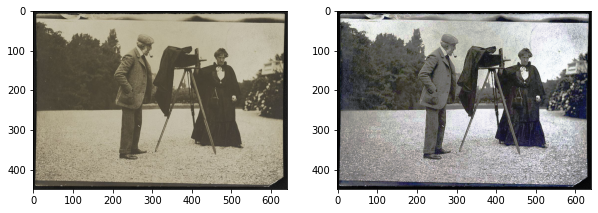

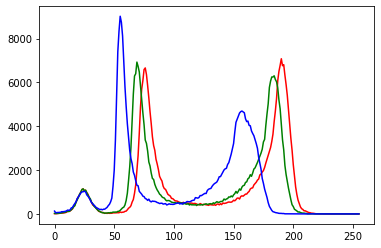

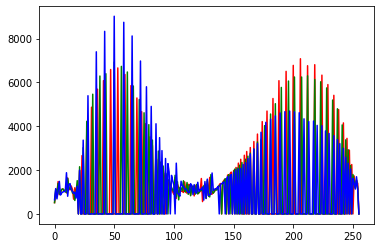

In [8]:
# Beolvassuk a képet a megadott URL címről
url = "https://www.creativelive.com/blog/wp-content/uploads/2014/05/6057153876_e5ea9b85e9_z.jpg"
img = io.imread(url)

# Szétbontjuk R-G-B csatornákra
R, G, B = cv2.split(img)

# Csatornánként módosítjuk a hisztogramot
eq_R = cv2.equalizeHist(R)
eq_G = cv2.equalizeHist(G)
eq_B = cv2.equalizeHist(B)

# Equalization után összeállítjuk az eredeti képet
eq = cv2.merge((eq_R, eq_G, eq_B))

# Megjelnítjük a képeket előtte-utána
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
ax[0].imshow(img)
ax[1].imshow(eq)
plt.show()

# Megjelenítjük a hisztogramokat előtte-utána
RGBhist(img)
plt.show()
RGBhist(eq)
plt.show()

### Hasznos anyagok:

- Dokumentációk
    - Python hivatalos dokumentációja: https://docs.python.org/3/
    - [PEP 8](https://peps.python.org/pep-0008/) Style Guide for Python Code - Melyek a jó és rossz programozási praktikák
    - NumPy hivatalos dokumentációja: https://numpy.org/doc/1.25/
- Tankönyvek
    - [Dive Into Python 3](http://diveintopython3.problemsolving.io/)
    - [Dive into Deep Learning](https://d2l.ai/) - Interaktív tankönyv Deep Learninghez
    - [Fluent Python: Clear, Concise, and Effective Programming by Luciano Ramalho](https://www.oreilly.com/library/view/fluent-python/9781491946237/) - Haladóbb szemléletű Python programozás
- Útmutatók
    - [The Official Python Tutorial](https://docs.python.org/3/tutorial/) - Self-explanatory?
    - [Foglalt Keyword lista](https://docs.python.org/3.0/reference/lexical_analysis.html#id8) - Ezeket ne használd változónévnek!
    - [Codecademy](https://www.codecademy.com/catalog) - Interaktív (fizetős) online tutorial
    - [CheckIO](https://py.checkio.org/) - Tanulj Pythont játékfejlesztésen kersztül
- Competitive Programming
    - [Codewars](https://www.codewars.com/?language=python)
    - [CodeForces](https://codeforces.com/)